# CoronaVirus Prediction

In [1]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [2]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.000000   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -28.016700   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -41.454500   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.034300   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                   Benin   9.307700   
25                            NaN                  Bhutan  27.514200   
26                            NaN                 Bolivia -16.290200   
27                            NaN  Bosnia and Herzegovina  43.915900   
28                            NaN                  Brazil -14.235000   
29                            NaN                  Brunei   4.535300   
..                            ...                     ...        ...   
219               Channel Islands          United Kingdom  49.372300   
220                     Gibraltar          United Kingdom  36.140800   
221                   Isle of Man          United Kingdom  54.236100   
222                    Montserrat          United Kingdom  16.742500   
223                           NaN          United Kingdom  55.378100   
224                           NaN                 Uruguay -32.522800   
225                           NaN           United States  37.090200   
226                           NaN              Uzbekistan  41.377500   
227                           NaN               Venezuela   6.423800   
228                           NaN                 Vietnam  16.000000   
229                           NaN                  Zambia -15.416700   
230                           NaN                Zimbabwe -20.000000   
231              Diamond Princess                  Canada   0.000000   
232                           NaN                Dominica  15.415000   
233                           NaN                 Grenada  12.116500   
234                           NaN              Mozambique -18.665695   
235                           NaN                   Syria  34.802075   
236                           NaN             Timor-Leste  -8.874217   
237                           NaN                  Belize  13.193900   
238                     Recovered                  Canada   0.000000   
239                           NaN                    Laos  19.856270   
240                           NaN                   Libya  26.335100   
241                           NaN      West Bank and Gaza  31.952200   
242                           NaN           Guinea-Bissau  

## Get Population

In [3]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [4]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.000000   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -28.016700   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -41.454500   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.034300   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                   Benin   9.307700   
25                            NaN                  Bhutan  27.514200   
26                            NaN                 Bolivia -16.290200   
27                            NaN  Bosnia and Herzegovina  43.915900   
28                            NaN                  Brazil -14.235000   
29                            NaN                  Brunei   4.535300   
..                            ...                     ...        ...   
219               Channel Islands          United Kingdom  49.372300   
220                     Gibraltar          United Kingdom  36.140800   
221                   Isle of Man          United Kingdom  54.236100   
222                    Montserrat          United Kingdom  16.742500   
223                           NaN          United Kingdom  55.378100   
224                           NaN                 Uruguay -32.522800   
225                           NaN           United States  37.090200   
226                           NaN              Uzbekistan  41.377500   
227                           NaN               Venezuela   6.423800   
228                           NaN                 Vietnam  16.000000   
229                           NaN                  Zambia -15.416700   
230                           NaN                Zimbabwe -20.000000   
231              Diamond Princess                  Canada   0.000000   
232                           NaN                Dominica  15.415000   
233                           NaN                 Grenada  12.116500   
234                           NaN              Mozambique -18.665695   
235                           NaN                   Syria  34.802075   
236                           NaN             Timor-Leste  -8.874217   
237                           NaN                  Belize  13.193900   
238                     Recovered                  Canada   0.000000   
239                           NaN                    Laos  19.856270   
240                           NaN                   Libya  26.335100   
241                           NaN      West Bank and Gaza  31.952200   
242                           NaN           Guinea-Bissau  

In [5]:
# merge region death
death.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN            Norway  60.4720    8.4689        0        0   
176            NaN              Oman  21.0000   57.0000        0        0   
177            NaN          Pakistan  30.3753   69.3451        0        0   
178            NaN            Panama   8.5380  -80.7821        0        0   
179            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
180            NaN          Paraguay -23.4425  -58.4438        0        0   
181            NaN              Peru  -9.1900  -75.0152        0        0   
182            NaN       Philippines  13.0000  122.0000        0        0   
183            NaN            Poland  51.9194   19.1451        0        0   
184            NaN          Portugal  39.3999   -8.2245        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/20/20  3/21/20  3/22/20  \
175        0        0        0        0  ...        7        7        7   
176        0        0        0        0  ...        0        0        0   
177        0        0        0        0  ...        3        3        5   
178        0        0        0        0  ...        1        1        3   
179        0        0        0        0  ...        0        0        0   
180        0        0        0        0  ...        0        1        1   
181        0        0        0        0  ...        3        5        5   
182        0        0        0        0  ...       18       19       25   
183        0        0        0        0  ...        5        5        7   
184        0        0        0        0  ...        6       12       14   

     3/23/20  3/24/20  3/25/20  3/26/20  3/27/20   Population   \
175       10       12       14       14       19     5,357,000   
176        0        0        0        0        0     4,636,000   
177        6        7        8        9       11   197,000,000   
178        6        6        8        8        9           NaN   
179        0        0        0        0        0           NaN   
180        1        2        3        3        3           NaN   
181        5        7        9        9       11           NaN   
182       33       35       38       45       54   104,900,000   
183        8       10       14       16       16    37,980,000   
184       23       33       43       60       76    10,290,000   

                   region  
175            Norway_nan  
176              Oman_nan  
177          Pakistan_nan  
178            Panama_nan  
179  Papua New Guinea_nan  
180          Paraguay_nan  
181              Peru_nan  
182       Philippines_nan  
183            Poland_nan  
184          Portugal_nan  

[10 rows x 72 columns]

In [6]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN            Panama   8.5380  -80.7821        0        0   
176            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
177            NaN          Paraguay -23.4425  -58.4438        0        0   
178            NaN              Peru  -9.1900  -75.0152        0        0   
179            NaN       Philippines  13.0000  122.0000        0        0   
180            NaN            Poland  51.9194   19.1451        0        0   
181            NaN          Portugal  39.3999   -8.2245        0        0   
182            NaN             Qatar  25.3548   51.1839        0        0   
183            NaN           Romania  45.9432   24.9668        0        0   
184            NaN            Russia  60.0000   90.0000        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/20/20  3/21/20  3/22/20  \
175        0        0        0        0  ...        0        0        0   
176        0        0        0        0  ...        0        0        0   
177        0        0        0        0  ...        0        0        0   
178        0        0        0        0  ...        1        1        1   
179        0        0        0        0  ...        8       13       17   
180        0        0        0        0  ...        1        1        1   
181        0        0        0        0  ...        5        5        5   
182        0        0        0        0  ...       10       27       33   
183        0        0        0        0  ...       25       52       64   
184        0        0        0        0  ...        9       12       16   

     3/23/20  3/24/20  3/25/20  3/26/20  3/27/20   Population   \
175        0        1        1        2        2           NaN   
176        0        0        0        0        0           NaN   
177        0        0        0        0        1           NaN   
178        1        1        1       14       16           NaN   
179       17       20       26       28       31   104,900,000   
180        1        1        7        7        7    37,980,000   
181        5       22       22       43       43    10,290,000   
182       33       41       41       43       43           NaN   
183       64       79       86       94      115    19,530,000   
184       16       22       29       38       45   144,500,000   

                   region  
175            Panama_nan  
176  Papua New Guinea_nan  
177          Paraguay_nan  
178              Peru_nan  
179       Philippines_nan  
180            Poland_nan  
181          Portugal_nan  
182             Qatar_nan  
183           Romania_nan  
184            Russia_nan  

[10 rows x 72 columns]

In [7]:
confirmed.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN            Norway  60.4720    8.4689        0        0   
176            NaN              Oman  21.0000   57.0000        0        0   
177            NaN          Pakistan  30.3753   69.3451        0        0   
178            NaN            Panama   8.5380  -80.7821        0        0   
179            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
180            NaN          Paraguay -23.4425  -58.4438        0        0   
181            NaN              Peru  -9.1900  -75.0152        0        0   
182            NaN       Philippines  13.0000  122.0000        0        0   
183            NaN            Poland  51.9194   19.1451        0        0   
184            NaN          Portugal  39.3999   -8.2245        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/20/20  3/21/20  3/22/20  \
175        0        0        0        0  ...     1914     2118     2385   
176        0        0        0        0  ...       48       52       55   
177        0        0        0        0  ...      501      730      776   
178        0        0        0        0  ...      137      200      313   
179        0        0        0        0  ...        1        1        1   
180        0        0        0        0  ...       13       18       22   
181        0        0        0        0  ...      234      318      363   
182        0        0        0        0  ...      230      307      380   
183        0        0        0        0  ...      425      536      634   
184        0        0        0        0  ...     1020     1280     1600   

     3/23/20  3/24/20  3/25/20  3/26/20  3/27/20   Population   \
175     2621     2863     3084     3369     3755     5,357,000   
176       66       84       99      109      131     4,636,000   
177      875      972     1063     1201     1373   197,000,000   
178      345      345      443      558      674           NaN   
179        1        1        1        1        1           NaN   
180       22       27       37       41       52           NaN   
181      395      416      480      580      635           NaN   
182      462      552      636      707      803   104,900,000   
183      749      901     1051     1221     1389    37,980,000   
184     2060     2362     2995     3544     4268    10,290,000   

                   region  
175            Norway_nan  
176              Oman_nan  
177          Pakistan_nan  
178            Panama_nan  
179  Papua New Guinea_nan  
180          Paraguay_nan  
181              Peru_nan  
182       Philippines_nan  
183            Poland_nan  
184          Portugal_nan  

[10 rows x 72 columns]

## Create Time Series + Plots

In [8]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [9]:

## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute

ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [10]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,:1].plot(marker='*',figsize=(20,8)).set_title('Daily Total Confirmed - Top World Region ',fontdict={'fontsize': 22})
p.iloc[:,2:25].plot(marker='*',figsize=(20,8)).set_title('Daily Total Confirmed - Major 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,:1].plot(marker='*',figsize=(20,8)).set_title('Daily Total Death - Top World Region',fontdict={'fontsize': 22})
p_d.iloc[:,2:25].plot(marker='*',figsize=(20,8)).set_title('Daily Total Death - Major 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,:1].plot(marker='*',figsize=(20,8)).set_title('Daily Total Recoverd - Top World Region',fontdict={'fontsize': 22})
p_r.iloc[:,2:25].plot(marker='*',figsize=(20,8)).set_title('Daily Total Recoverd - Major 2nd Areas',fontdict={'fontsize': 22})

Text(0.5, 1.0, 'Daily Total Recoverd - Major 2nd Areas')

## Kalman Filter With R

In [11]:
# Create data for R script
ts_r=ts.reset_index()
ts_r=ts_r.rename(columns = {'index':'date'})
ts_r['date']=pd.to_datetime(ts_r['date'] ,errors ='coerce')
ts_r.to_csv(r'/home/notebookuser/notebooks/covid19/korean/ts_r.csv')

In [12]:
#!pip install rpy2


In [13]:
import rpy2
%load_ext rpy2.ipython

In [14]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')


NULL


In [15]:
%%R
Sys.setenv(TZ='GMT')
Sys.timezone()


[1] "GMT"


In [16]:
%%R
require(pracma)
require(Metrics)
require(readr)
Sys.setenv(TZ='GMT')
all<- read_csv("/home/notebookuser/notebooks/covid19/ts_2_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [17]:
p=%R pred_all

In [18]:
############ Merge R output due to package problem
t=ts_d
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

## Pre Proccessing Data for ML Model

### Extract Weather Data

In [35]:
#!pip install pyweatherbit


In [36]:

#from weatherbit.api import Api
#import json  
#import pandas as pd  
#from pandas.io.json import json_normalize 

#api_key = "26141d374d8e49d0a2e1f1254428ce8e"
#api_key ="f206579c74644c4b96a2423cb56a1687"
# #api_key ="81a581ac823849f38427fb5081cb8df8"
# #api_key ="be7aaf4ff7184347aa1ebc2a2db514fe"

#api = Api(api_key)
#api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.
#api.get_forecast(lat='Lat', lon='Lon')

###Weather History

In [37]:

# ################## already done since API is limited to 500 call per day

# w=pd.DataFrame(columns=['date','region','min','max'])
# for i in range (61,len(confirmed)):
#   start_date=pd.to_datetime('2020-01-22')
#   for j in range (4,confirmed.shape[1]-2):
#     jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date.strftime('%Y-%m-%d'),end_date=(start_date+ pd.DateOffset(days=1)).strftime('%Y-%m-%d')).json
#     # j=json_normalize(j)
#     # j=j['data']
#     # max_temp=json_normalize(j['data'])['max_temp'].values[0] # max
#     # min_temp=json_normalize(j['data'])['min_temp'].values[0]
#     try:
#       w=w.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
#     except Exception:
#       w=w.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':None,'max':None}, ignore_index=True)
#     start_date=start_date+ pd.DateOffset(days=1)

In [38]:

# ################## Update Recent Day Weather

# w_update=pd.DataFrame(columns=['date','region','min','max'])
# for i in range (28,len(confirmed)):
#   start_date=pd.to_datetime('2020-02-17')
#   for j in range (confirmed.shape[1]-4,confirmed.shape[1]-2):
#     jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date.strftime('%Y-%m-%d'),end_date=(start_date+ pd.DateOffset(days=1)).strftime('%Y-%m-%d')).json
#     try:
#       w_update=w_update.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
#     except Exception:
#       w_update=w_update.append({'date':confirmed.columns[j],'region':confirmed.iloc[i,confirmed.shape[1]-1] ,'min':None,'max':None}, ignore_index=True)
#     start_date=start_date+ pd.DateOffset(days=1)

In [39]:

# w_update.to_csv(r'w_update.csv')

### Extract Weather Forecast Data

In [40]:

# ################## Forecast Weather With API - Already Done
# #forecast = api.get_forecast(lat=lat, lon=lon)

# w_forecast=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
# for i in range (0,len(confirmed)):
#     jas=api.get_forecast(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3]).json
#     jas=json_normalize(jas['data'])[['datetime','min_temp','max_temp']]
#     try:
#       w_forecast_temp=jas
#       w_forecast_temp['region']=confirmed.iloc[i,confirmed.shape[1]-1]
#     except Exception:
#       w_forecast_temp=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
#     w_forecast=w_forecast.append(w_forecast_temp)
# w_forecast=w_forecast[['datetime','region','min_temp','max_temp']]
# w_forecast.columns = ['date', 'region', 'min', 'max']
# w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y-%m-%d')

In [19]:
w=pd.read_csv('/home/notebookuser/notebooks/covid19/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')
#w['date']=pd.to_datetime(w['date'],errors ='coerce')

w_forecast=pd.read_csv('/home/notebookuser/notebooks/covid19/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Build Train Set Data Structure

In [20]:
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [21]:
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
  if(t.iloc[i,1] is t.iloc[i-2,1]):
    t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
    t.iloc[i,6]=((t.iloc[i-1,2] +1)/(t.iloc[i-2,2] +1))*100
    t.iloc[i,9]=t.iloc[i-1,2]
  if(t.iloc[i,1] is t.iloc[i-4,1]):
    t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
    t.iloc[i,7]=((t.iloc[i-1,2] +1)/(t.iloc[i-4,2] +1))*100
  if(t.iloc[i,1] is t.iloc[i-8,1]):
    t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
    t.iloc[i,8]=((t.iloc[i-1,2] +1)/(t.iloc[i-8,2] +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)
### Joao - Fix NaN Kalman_Filter
#t['kalman_prediction']=round(t['kalman_prediction'])
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])
#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(1)
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=((train['last_day'] +1)/((train['population'] +1) *10000))
#
train=train.merge(w,how='left',on=['date','region'])
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
  if(np.isnan(train.iloc[i,13])):
    if(train.iloc[i,1] is train.iloc[i-1,1]):
      train.iloc[i,13]=train.iloc[i-1,13]
      train.iloc[i,14]=train.iloc[i-1,14]

## Kalman 1 day Prediction with Evaluation

         region           mse          rmse           mae
68  China_Hubei  2.961362e+09  54418.401116  47964.318182


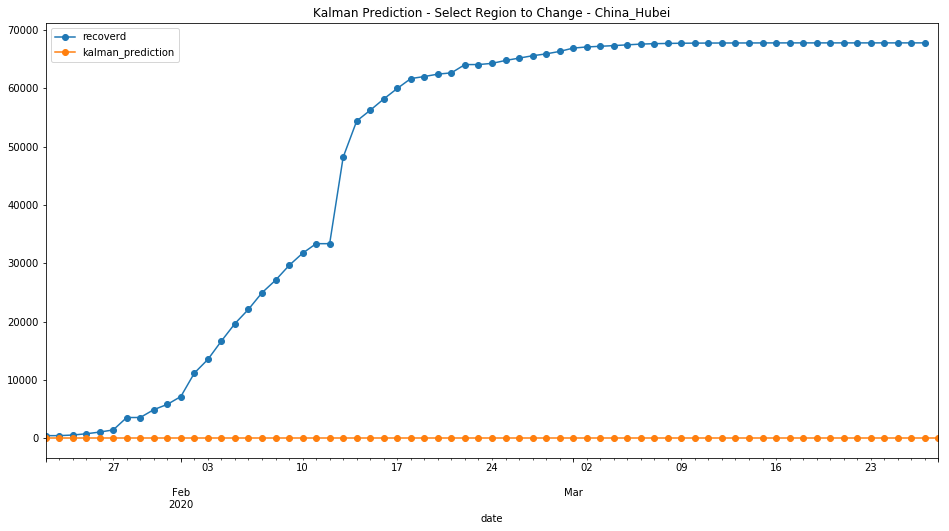

In [22]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='China_Hubei'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

            region           mse        rmse         mae
80  China_Shanghai  96833.257576  311.180426  290.287879


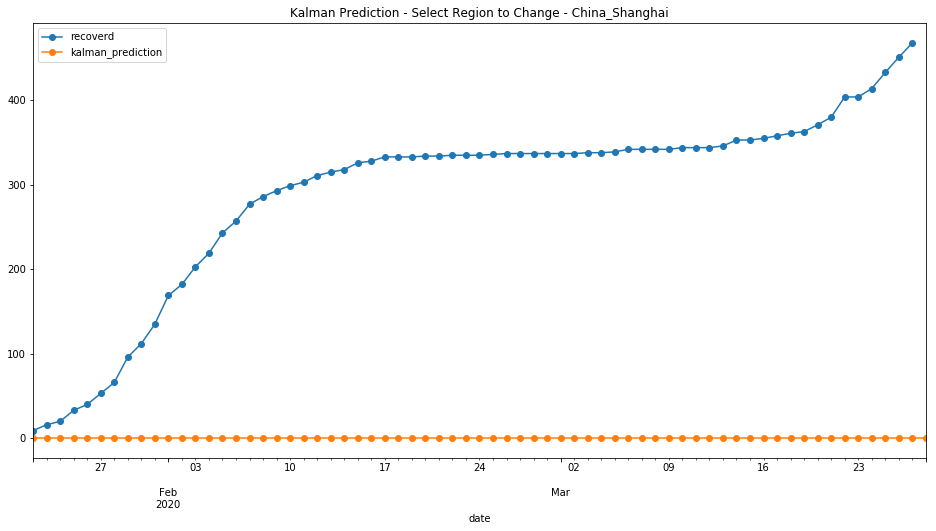

In [23]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='China_Shanghai'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse          mae
146  Italy_nan  6.623657e+08  25736.466964  12324.19697


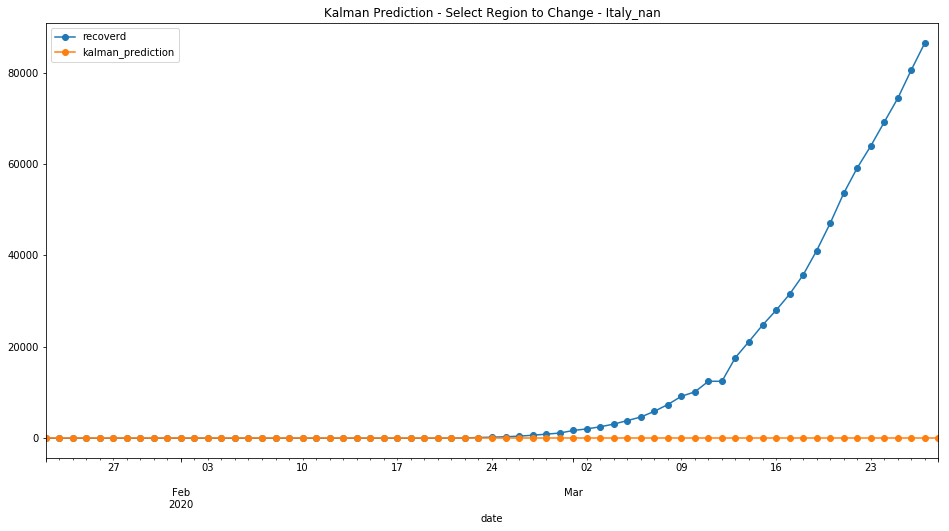

In [24]:
region='Italy_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

                region           mse         rmse          mae
241  United States_nan  4.388294e+08  20948.25457  7191.272727


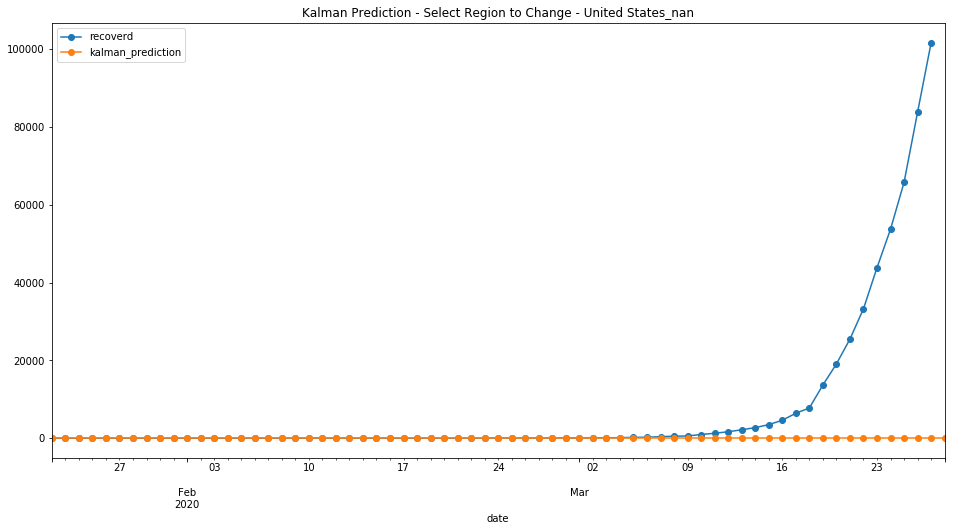

In [25]:
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse         rmse          mae
240  United Kingdom_nan  9.778701e+06  3127.091467  1209.924242


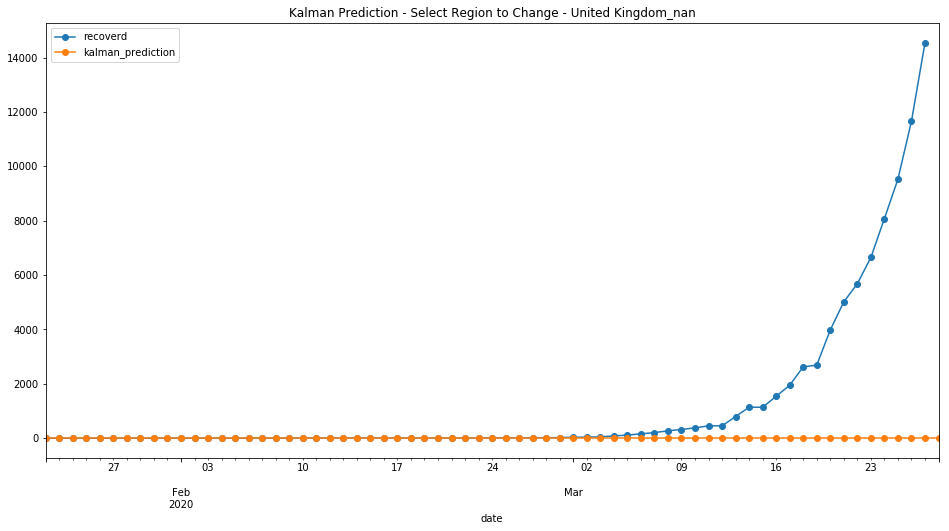

In [26]:
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [27]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='9G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmps21xg8ac
  JVM stdout: /tmp/tmps21xg8ac/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmps21xg8ac/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 5 months and 2 days !!!
H2O cluster name:           H2O_from_python_unknownUser_q95oog
H2O cluster total nodes:    1
H2O cluster free memory:    9 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [34]:
train=train.fillna(0) 

###train_df=train[train['date']<'2020-02-17']
###boots=train_df[train_df['date']>='2020-02-14'] # some bootstrap to give more weight for recent days
###train_df=train_df.append([boots[boots['date']>='2020-02-14']]*1000,ignore_index=True)
###train_df_hubei=train_df[train_df['region']=='China_Hubei']
###test=train[train['date']>='2020-02-17']
###test=test[test['date']<'2020-02-19']
###
### Joao - Training in Italy progression - When growth happened 2020/03/18 to 2020/03/21
train_df=train[train['date']<'2020-03-18']
boots=train_df[train_df['date']>='2020-03-25'] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>='2020-03-18']]*1000,ignore_index=True)

### Train in Spain progression of the Virus
train_df_v2=train_df[train_df['region']=='Spain_nan']
test=train[train['date']>='2020-03-21']
test=test[test['date']<'2020-03-28']

In [35]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
          ]

In [36]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values
pred2.iloc[:55]

0  confirmed       date                   region
0    42.0         24 2020-03-21          Afghanistan_nan
1    41.0         40 2020-03-22          Afghanistan_nan
2    62.0         40 2020-03-23          Afghanistan_nan
3    59.0         74 2020-03-24          Afghanistan_nan
4   105.0         84 2020-03-25          Afghanistan_nan
5   111.0         94 2020-03-26          Afghanistan_nan
6   123.0        110 2020-03-27          Afghanistan_nan
7    77.0         76 2020-03-21              Albania_nan
8    83.0         89 2020-03-22              Albania_nan
9    99.0        104 2020-03-23              Albania_nan
10  116.0        123 2020-03-24              Albania_nan
11  138.0        146 2020-03-25              Albania_nan
12  164.0        174 2020-03-26              Albania_nan
13  196.0        186 2020-03-27              Albania_nan
14  118.0        139 2020-03-21              Algeria_nan
15  181.0        201 2020-03-22              Algeria_nan
16  253.0        230 2020-03-23              Algeria_nan
17  281.0        264 2020-03-24              Algeria_nan
18  316.0        302 2020-03-25              Algeria_nan
19  354.0        367 2020-03-26              Algeria_nan
20  431.0        409 2020-03-27              Algeria_nan
21  118.0         88 2020-03-21              Andorra_nan
22  137.0        113 2020-03-22              Andorra_nan
23  177.0        133 2020-03-23              Andorra_nan
24  187.0        164 2020-03-24              Andorra_nan
25  190.0        188 2020-03-25              Andorra_nan
26  214.0        224 2020-03-26              Andorra_nan
27  255.0        267 2020-03-27              Andorra_nan
28    2.0          2 2020-03-21               Angola_nan
29    6.0          2 2020-03-22               Angola_nan
30    7.0          3 2020-03-23               Angola_nan
31    7.0          3 2020-03-24               Angola_nan
32    7.0          3 2020-03-25               Angola_nan
33    7.0          4 2020-03-26               Angola_nan
34    9.0          4 2020-03-27               Angola_nan
35    2.0          1 2020-03-21  Antigua and Barbuda_nan
36    2.0          1 2020-03-22  Antigua and Barbuda_nan
37    2.0          3 2020-03-23  Antigua and Barbuda_nan
38    5.0          3 2020-03-24  Antigua and Barbuda_nan
39    6.0          3 2020-03-25  Antigua and Barbuda_nan
40    6.0          7 2020-03-26  Antigua and Barbuda_nan
41   11.0          7 2020-03-27  Antigua and Barbuda_nan
42  150.0        158 2020-03-21            Argentina_nan
43  184.0        266 2020-03-22            Argentina_nan
44  323.0        301 2020-03-23            Argentina_nan
45  346.0        387 2020-03-24            Argentina_nan
46  452.0        387 2020-03-25            Argentina_nan
47  425.0        502 2020-03-26            Argentina_nan
48  576.0        589 2020-03-27            Argentina_nan
49  167.0        160 2020-03-21              Armenia_nan
50  189.0        194 2020-03-22              Armenia_nan
51  226.0        235 2020-03-23              Armenia_nan
52  269.0        249 2020-03-24              Armenia_nan
53  275.0        265 2020-03-25              Armenia_nan
54  291.0        290 2020-03-26              Armenia_nan

In [37]:
pred2.iloc[100:150]

0  confirmed       date                       region
100   429.0        355 2020-03-23           Australia_Victoria
101   404.0        411 2020-03-24           Australia_Victoria
102   467.0        466 2020-03-25           Australia_Victoria
103   517.0        520 2020-03-26           Australia_Victoria
104   579.0        574 2020-03-27           Australia_Victoria
105    77.0         90 2020-03-21  Australia_Western Australia
106   110.0        120 2020-03-22  Australia_Western Australia
107   145.0        140 2020-03-23  Australia_Western Australia
108   163.0        175 2020-03-24  Australia_Western Australia
109   205.0        175 2020-03-25  Australia_Western Australia
110   195.0        231 2020-03-26  Australia_Western Australia
111   267.0        231 2020-03-27  Australia_Western Australia
112  2685.0       2814 2020-03-21                  Austria_nan
113  3148.0       3582 2020-03-22                  Austria_nan
114  4053.0       4474 2020-03-23                  Austria_nan
115  5062.0       5283 2020-03-24                  Austria_nan
116  5919.0       5588 2020-03-25                  Austria_nan
117  6088.0       6909 2020-03-26                  Austria_nan
118  7706.0       7657 2020-03-27                  Austria_nan
119    50.0         53 2020-03-21               Azerbaijan_nan
120    63.0         65 2020-03-22               Azerbaijan_nan
121    75.0         72 2020-03-23               Azerbaijan_nan
122    82.0         87 2020-03-24               Azerbaijan_nan
123   100.0         93 2020-03-25               Azerbaijan_nan
124   104.0        122 2020-03-26               Azerbaijan_nan
125   140.0        165 2020-03-27               Azerbaijan_nan
126     8.0          4 2020-03-21                  Bahamas_nan
127    10.0          4 2020-03-22                  Bahamas_nan
128     9.0          4 2020-03-23                  Bahamas_nan
129     7.0          5 2020-03-24                  Bahamas_nan
130     8.0          5 2020-03-25                  Bahamas_nan
131     8.0          9 2020-03-26                  Bahamas_nan
132    13.0         10 2020-03-27                  Bahamas_nan
133   305.0        305 2020-03-21                  Bahrain_nan
134   327.0        334 2020-03-22                  Bahrain_nan
135   360.0        377 2020-03-23                  Bahrain_nan
136   412.0        392 2020-03-24                  Bahrain_nan
137   421.0        419 2020-03-25                  Bahrain_nan
138   450.0        458 2020-03-26                  Bahrain_nan
139   492.0        466 2020-03-27                  Bahrain_nan
140    28.0         25 2020-03-21               Bangladesh_nan
141    34.0         27 2020-03-22               Bangladesh_nan
142    34.0         33 2020-03-23               Bangladesh_nan
143    41.0         39 2020-03-24               Bangladesh_nan
144    47.0         39 2020-03-25               Bangladesh_nan
145    45.0         44 2020-03-26               Bangladesh_nan
146    50.0         48 2020-03-27               Bangladesh_nan
147    11.0          6 2020-03-21                 Barbados_nan
148    14.0         14 2020-03-22                 Barbados_nan
149    29.0         17 2020-03-23                 Barbados_nan

In [38]:

train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time

training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Italian Model

model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=17)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2)

test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)

/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [39]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
model_v2.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF

variable  relative_importance  scaled_importance  percentage
0      infected_rate         4.155247e+10           1.000000    0.270382
1           last_day         4.034984e+10           0.971057    0.262557
2       7_day_change         2.231701e+10           0.537080    0.145217
3       1_day_change         2.152178e+10           0.517942    0.140042
4       3_day_change         2.029408e+10           0.488396    0.132054
5  7_day_change_rate         4.093880e+09           0.098523    0.026639
6  3_day_change_rate         2.493688e+09           0.060013    0.016226
7  1_day_change_rate         1.044629e+09           0.025140    0.006797
8                min         1.171715e+07           0.000282    0.000076
9                max         1.345409e+06           0.000032    0.000009

In [40]:
# # Model performance
# performance = model_hubei.model_performance(test_data=test_h20_hubei)
# # Model Create Predictions
# pred=model_hubei.predict(test_h20_hubei);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
# pred['confirmed']=test_hubei['confirmed'].values
# pred['date']=test_hubei['date'].values
# pred['region']=test_hubei['region'].values

# pred2=model.predict(test_h20);pred2=pred2.as_data_frame(); pred2=round(pred2)
# pred2['confirmed']=test['confirmed'].values
# pred2['date']=test['date'].values
# pred2['region']=test['region'].values
# pred=pred.append(pred2)

## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20)
# # Model Create Predictions
pred=model_v2.predict(test_h20);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test['confirmed'].values
pred['date']=test['date'].values
pred['region']=test['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


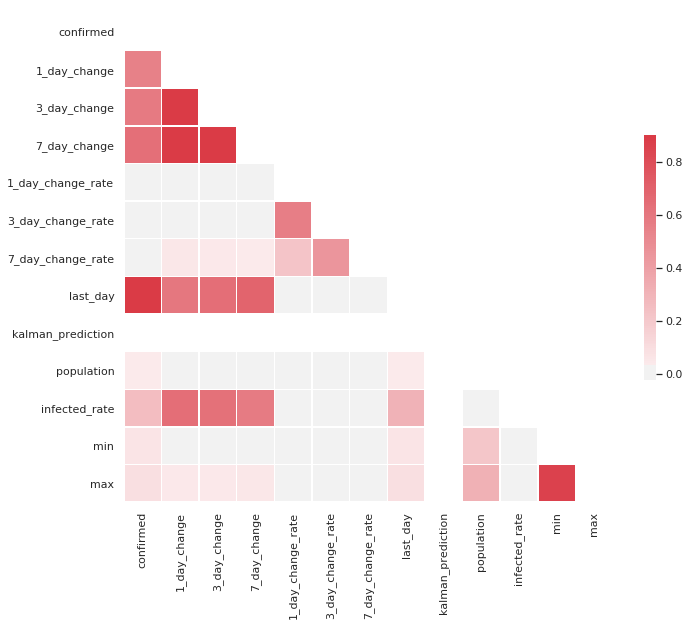

In [41]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [42]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.552458
3_day_change         0.583551
7_day_change         0.634875
1_day_change_rate    0.004062
3_day_change_rate    0.006106
7_day_change_rate    0.014336
last_day             0.942999
kalman_prediction         NaN
population           0.040747
infected_rate        0.253845
min                  0.069816
max                  0.094682
Name: confirmed, dtype: float64


Text(0.5, 1.0, 'Daily Min/Max Temperature - Italy')

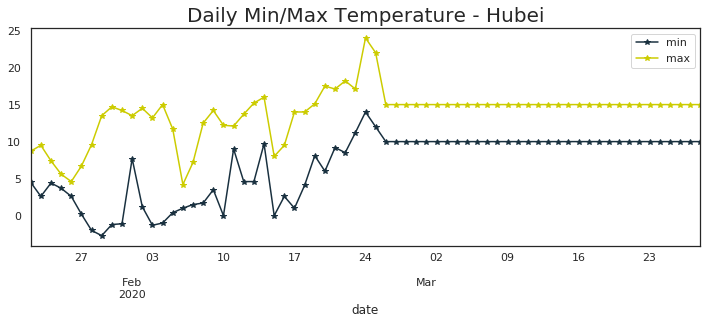

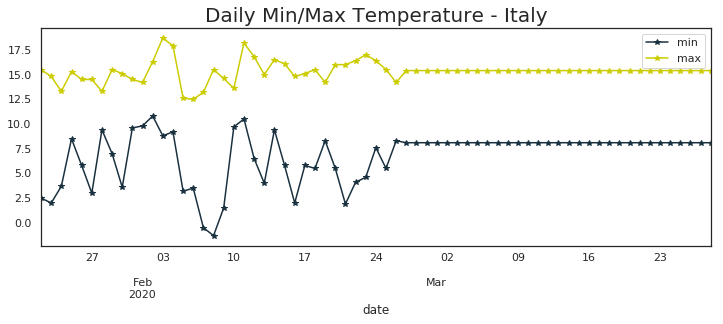

In [43]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')

p=p[p['region']=='China_Hubei']
p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - Hubei',fontdict={'fontsize': 20})

## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
p=train[['date','region','min','max']].set_index('date')
p=p[p['region']=='Italy_nan']
p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - Italy',fontdict={'fontsize': 20})
#
#

In [44]:
avg_temp=train[['region','confirmed','min','max']]  # from 17-02-20 to 16-03-2020
avg_temp=avg_temp.groupby(by='region').mean()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                                min        max
region                                        
China_Hubei                6.720896  13.823881
Italy_nan                  6.808955  15.320896
United States_nan          0.000000   0.000000
Spain_nan                  5.864706  14.732353
Iran_nan                   4.928986  14.246377
Germany_nan                1.470588   5.029412
France_nan                 2.567164   8.950746
Korea, South_nan           0.000000   0.000000
Switzerland_nan           -1.495890   1.619178
United Kingdom_nan         0.000000   0.000000
China_Guangdong           14.928358  25.094030
China_Henan                2.810448  10.023881
China_Zhejiang             8.580597  15.194030
Netherlands_nan            0.000000   0.000000
China_Hunan                9.250746  15.410448
China_Anhui                5.594030  12.076119
China_Jiangxi             10.332836  16.940299
Austria_nan               -2.802941   1.022059
Belgium_nan             

##Kalman X Days Ahead Prediction

In [46]:
%%R

#install.packages('reshape')

NULL


In [47]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/korean/ts_r.csv")
all$X1<-NULL
### JOAO
#### for (i in 1:30) { # Set i days prediction
#####for (i in 1:45) { # Set i days prediction
for (i in 1:75) { # Set i days prediction    
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [48]:
all_new=%R all_new

In [49]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

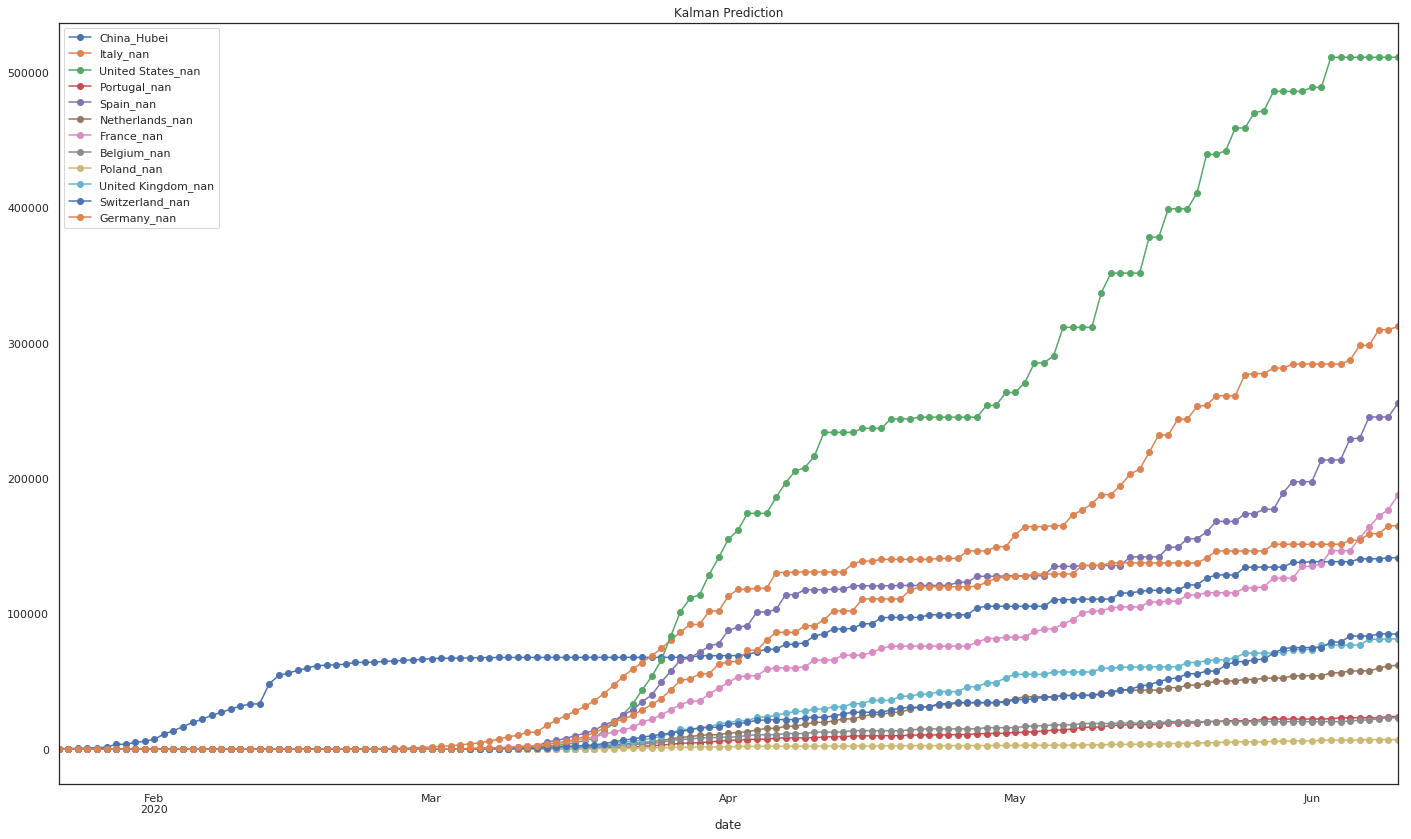

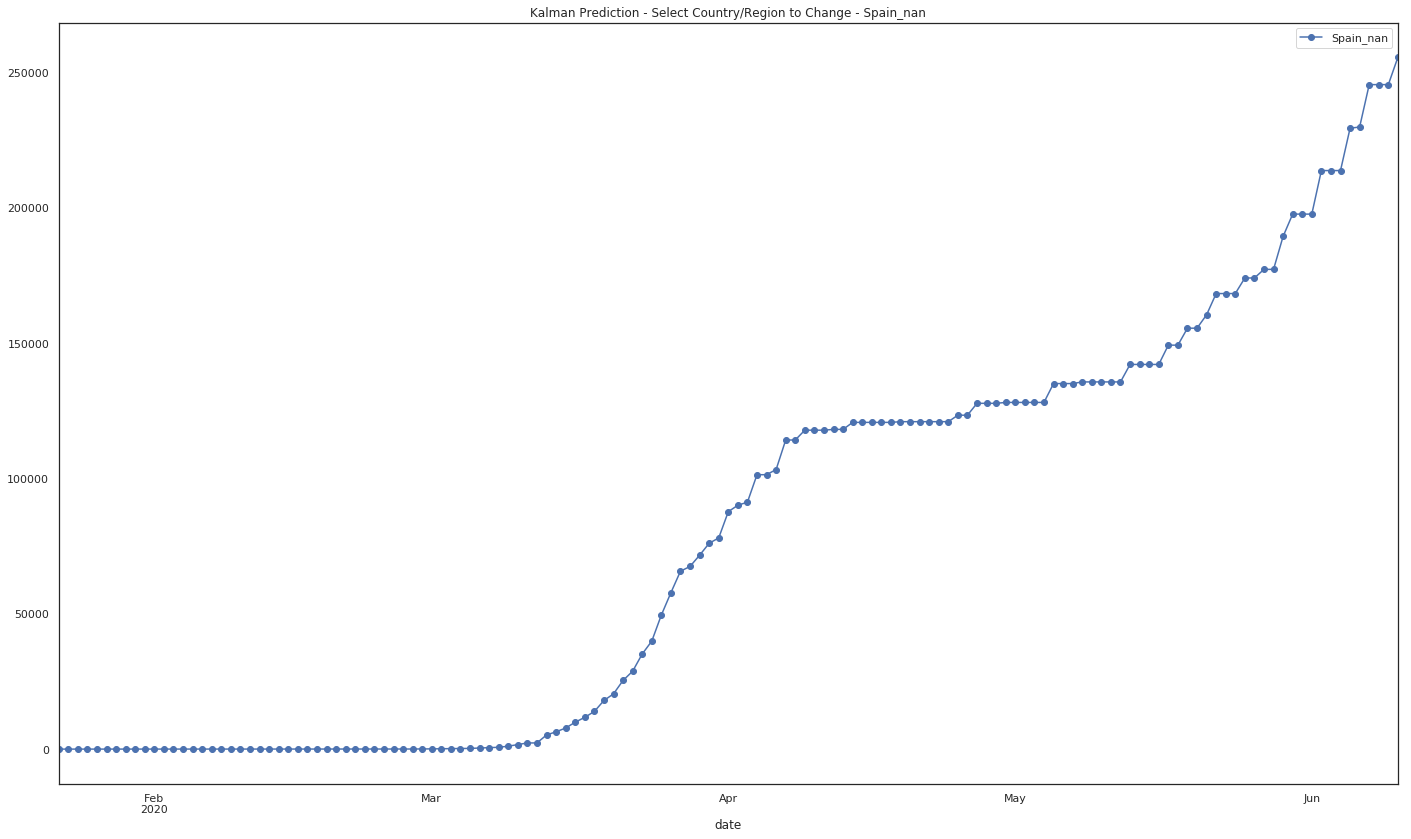

In [50]:
# ['Australia_New South Wales', 'Australia_Queensland',
#        'Australia_South Australia', 'Australia_Victoria', 'Belgium_nan',
#        'Cambodia_nan', 'Canada_British Columbia', 'Canada_London, ON',
#        'Canada_Toronto, ON', 'China_Anhui', 'China_Beijing',
#        'China_Chongqing', 'China_Fujian', 'China_Gansu',
#        'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
#        'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
#        'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
#        'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
#        'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
#        'China_Shandong', 'China_Shanghai', 'China_Shanxi',
#        'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
#        'China_Yunnan', 'China_Zhejiang', 'Egypt_nan', 'Finland_nan',
#        'France_nan', 'Germany_nan', 'Hong Kong_Hong Kong', 'India_nan',
#        'Italy_nan', 'Japan_nan', 'Macau_Macau', 'Malaysia_nan',
#        'Nepal_nan', 'Others_Diamond Princess cruise ship',
#        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
#        'South Korea_nan', 'Spain_nan', 'Sri Lanka_nan', 'Sweden_nan',
#        'Taiwan_Taiwan', 'Thailand_nan', 'UK_nan',
#        'United Arab Emirates_nan', 'Unites States_Boston, MA',
#        'Unites States_Chicago, IL', 'Unites States_Los Angeles, CA',
#        'Unites States_Madison, WI', 'Unites States_Orange, CA',
#        'Unites States_San Antonio, TX', 'Unites States_San Benito, CA',
#        'Unites States_San Diego County, CA',
#        'Unites States_Santa Clara, CA', 'Unites States_Seattle, WA',
#        'Unites States_Tempe, AZ', 'Vietnam_nan']
# Select region
region=['date',
 #       'China_Hubei',
 #      'China_Anhui', 'China_Beijing',
 #      'China_Chongqing', 'China_Fujian', 'China_Gansu',
 #      'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
 #      'China_Hainan', 'China_Hebei', 'China_Heilongjiang','China_Henan','China_Hunan', 
 #      'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
 #      'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
 #      'China_Shandong', 'China_Shanghai', 'China_Shanxi',
 #      'China_Sichuan',  'China_Xinjiang',
 #      'China_Yunnan', 'China_Zhejiang', 
 #     'Hong Kong_Hong Kong','Others_Diamond Princess cruise ship'
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'China_Hubei',
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan', 'France_nan', 
        'Belgium_nan', 'Poland_nan',
    #     'India_nan',
        'United Kingdom_nan', 
        'Switzerland_nan', 'Germany_nan',
  ### JOAO - LIST of Countries - Finish here       
  #      'Japan_nan'
       ]
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')

#p_kalman2=all_new[['date','China_Hubei']]
p_kalman2=all_new[['date','Spain_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))


Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Poland_nan')

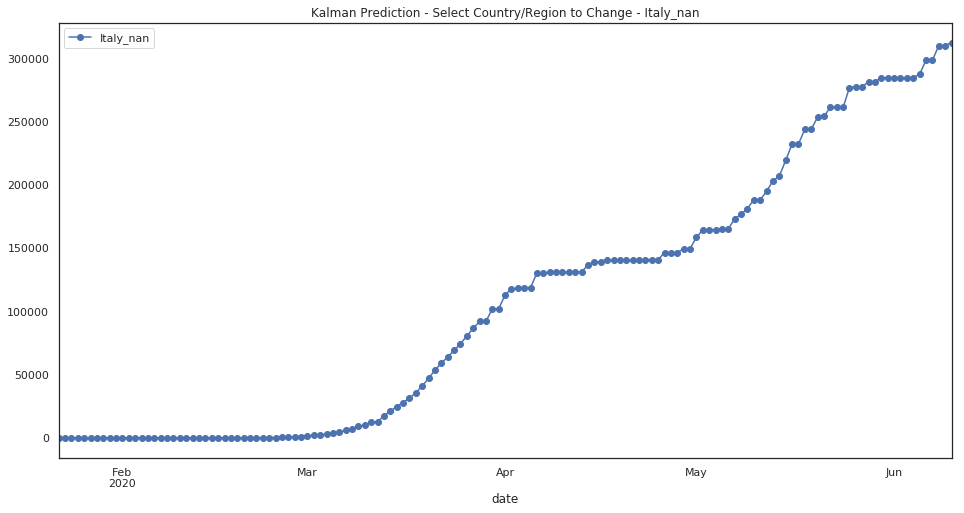

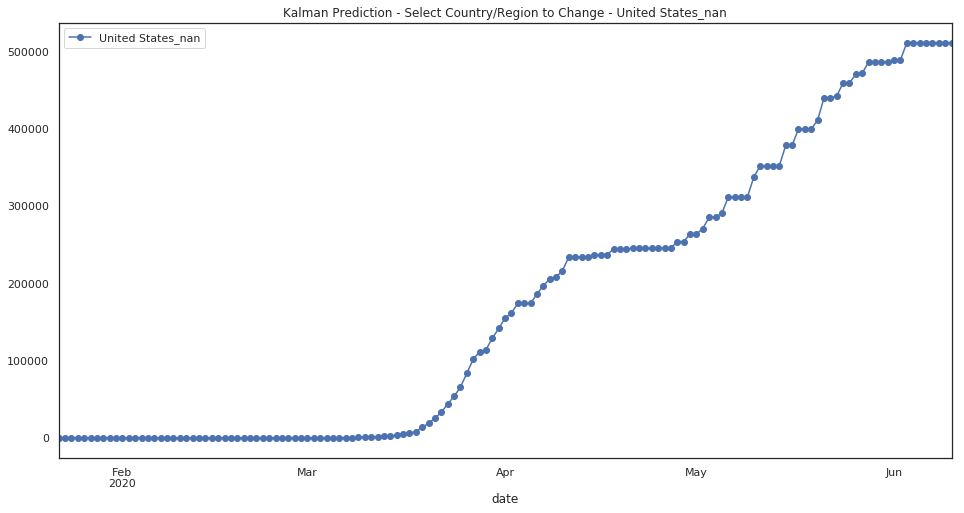

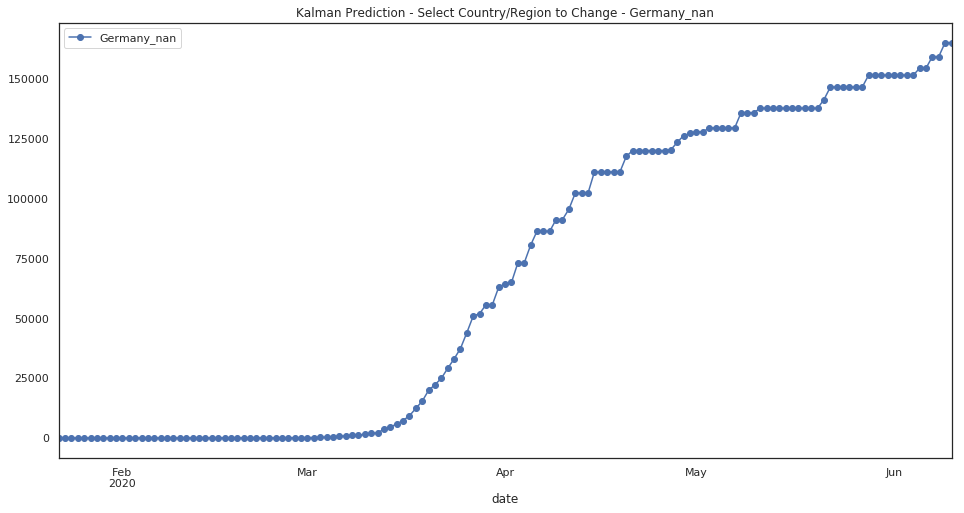

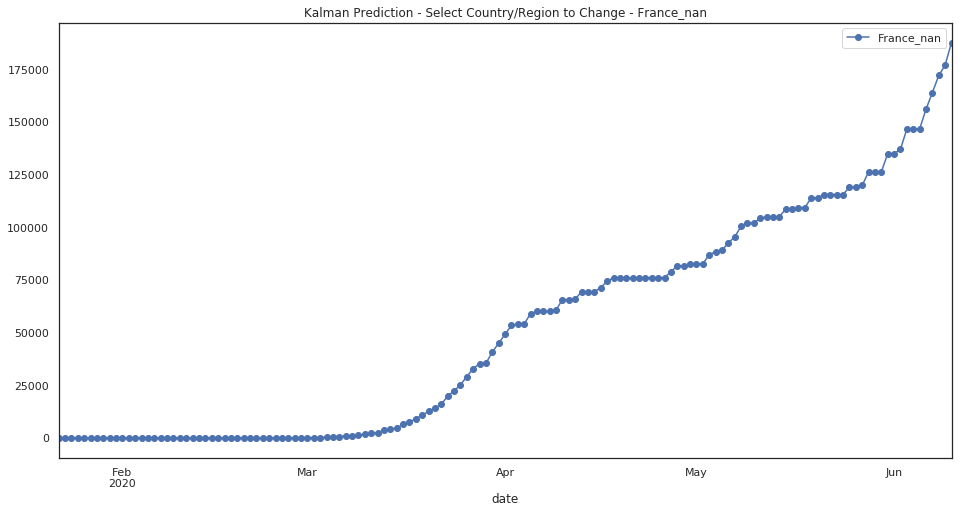

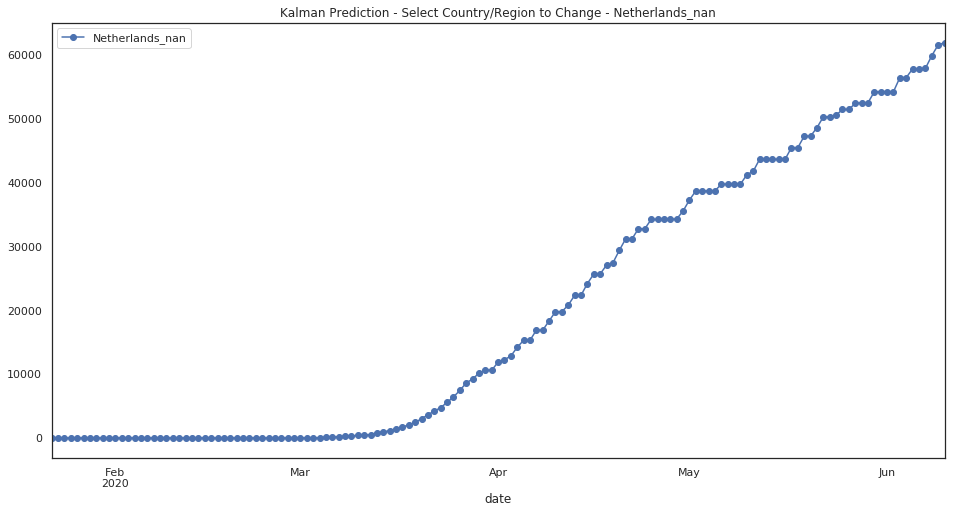

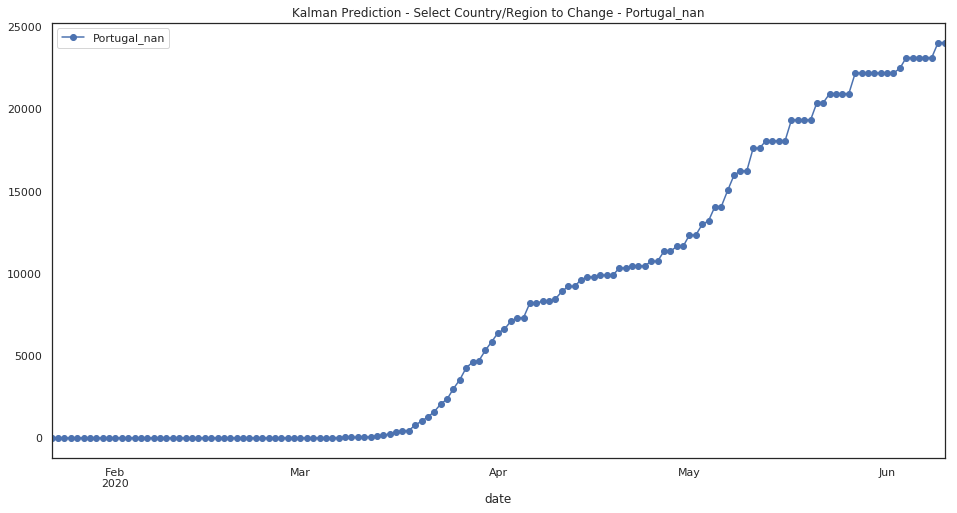

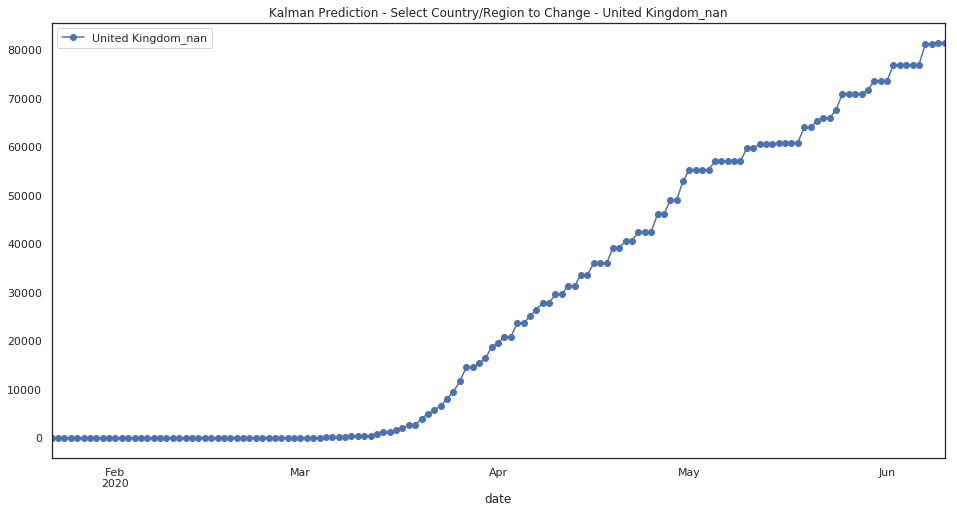

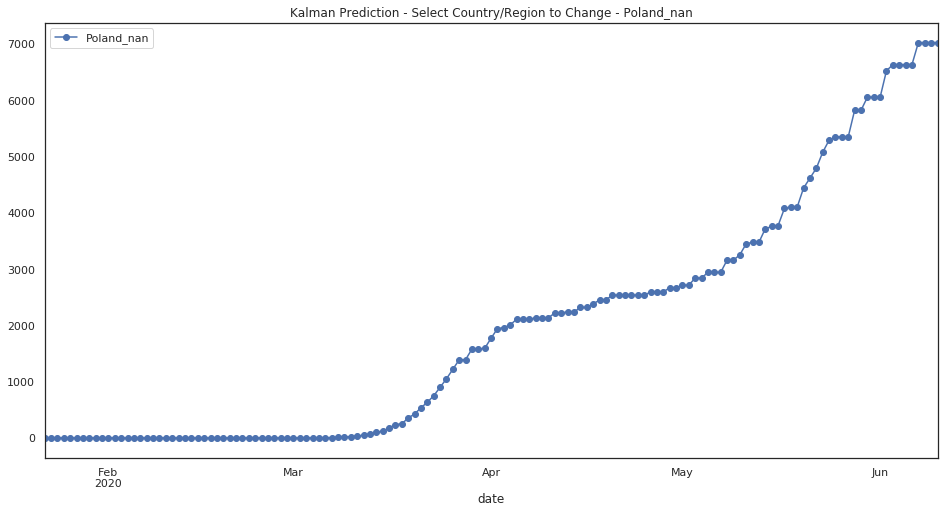

In [51]:
###
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))

p_kalman4=all_new[['date','United States_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))

p_kalman5=all_new[['date','Germany_nan']] ## Joao
p_kalman5=p_kalman5.set_index(['date'])
p_kalman5.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman5.columns[0]))

p_kalman6=all_new[['date','France_nan']] ## Joao
p_kalman6=p_kalman6.set_index(['date'])
p_kalman6.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman6.columns[0]))

p_kalman7=all_new[['date','Netherlands_nan']] ## Joao
p_kalman7=p_kalman7.set_index(['date'])
p_kalman7.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman7.columns[0]))

p_kalman8=all_new[['date','Portugal_nan']] ## Joao
p_kalman8=p_kalman8.set_index(['date'])
p_kalman8.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman8.columns[0]))

p_kalman9=all_new[['date','United Kingdom_nan']] ## Joao
p_kalman9=p_kalman9.set_index(['date'])
p_kalman9.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman9.columns[0]))


p_kalman10=all_new[['date','Poland_nan']] ## Joao
p_kalman10=p_kalman10.set_index(['date'])
p_kalman10.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman10.columns[0]))


Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - China_Hubei')

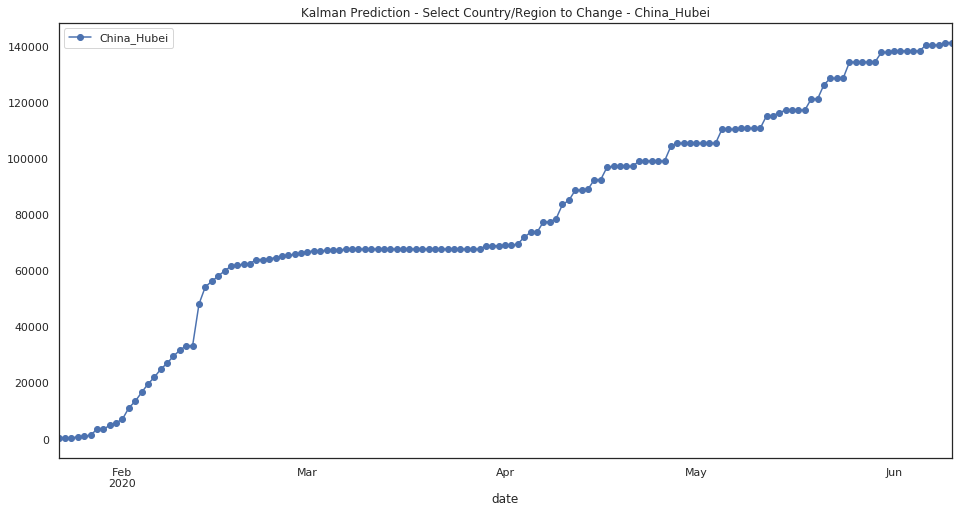

In [52]:
p_kalman_x1=all_new[['date','China_Hubei']] ## Joao
p_kalman_x1=p_kalman_x1.set_index(['date'])
p_kalman_x1.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_x1.columns[0]))


In [0]:
# t.to_csv(r't.csv')

## Iterative Regression

In [53]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
  if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
    t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
  if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
    t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
    t_iter.iloc[i,6]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-2,2]-1 +1))*100
    t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
  if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
    t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
    t_iter.iloc[i,7]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-4,2]-1 +1))*100
  if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
    t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
    t_iter.iloc[i,8]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-8,2]-1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(1)
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =(test_iter['last_day']+1)/(test_iter['population']+1)*10000
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
  if(np.isnan(test_iter.iloc[i,13])):
    if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
      test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
      test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [54]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [60]:
test_iter[31100:31130]

date     region  confirmed  1_day_change  3_day_change  \
28893 2020-03-09  Spain_nan     1073.0         173.0         414.0   
28894 2020-03-10  Spain_nan     1695.0         400.0         673.0   
28895 2020-03-11  Spain_nan     2277.0         622.0        1195.0   
28896 2020-03-12  Spain_nan     2277.0         582.0        1604.0   
28897 2020-03-13  Spain_nan     5232.0           0.0        1204.0   
28898 2020-03-14  Spain_nan     6391.0        2955.0        3537.0   
28899 2020-03-15  Spain_nan     7798.0        1159.0        4114.0   
28900 2020-03-16  Spain_nan     9942.0        1407.0        5521.0   
28901 2020-03-17  Spain_nan    11748.0        2144.0        4710.0   
28902 2020-03-18  Spain_nan    13910.0        1806.0        5357.0   
28903 2020-03-19  Spain_nan    17963.0        2162.0        6112.0   
28904 2020-03-20  Spain_nan    20410.0        4053.0        8021.0   
28905 2020-03-21  Spain_nan    25374.0        2447.0        8662.0   
28906 2020-03-22  Spain_nan    28768.0        4964.0       11464.0   
28907 2020-03-23  Spain_nan    35136.0        3394.0       10805.0   
28908 2020-03-24  Spain_nan    39885.0        6368.0       14726.0   
28909 2020-03-25  Spain_nan    49515.0        4749.0       14511.0   
28910 2020-03-26  Spain_nan    57786.0        9630.0       20747.0   
28911 2020-03-27  Spain_nan    65719.0        8271.0       22650.0   
28912 2020-03-28  Spain_nan    67486.0        7933.0       25834.0   
28913 2020-03-29  Spain_nan    71625.0        1767.0       17971.0   
28914 2020-03-30  Spain_nan    76028.0        4139.0       13839.0   
28915 2020-03-31  Spain_nan    78026.0        4403.0       10309.0   
28916 2020-04-01  Spain_nan    87717.0        1998.0       10540.0   
28917 2020-04-02  Spain_nan    90085.0        9691.0       16092.0   
28918 2020-04-03  Spain_nan    91227.0        2368.0       14057.0   
28919 2020-04-04  Spain_nan   101363.0        1142.0       13201.0   
28920 2020-04-05  Spain_nan   101363.0       10136.0       13646.0   
28921 2020-04-06  Spain_nan   103286.0           0.0       11278.0   
28922 2020-04-07  Spain_nan   114183.0        1923.0       12059.0   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
28893         589.0         134.800000         260.231660         802.380952   
28894         953.0         159.583952         268.500000         895.000000   
28895        1530.0         158.061510         339.200000        1027.878788   
28896        2055.0         134.395280         338.484398        1026.126126   
28897        2018.0         100.043917         212.301957         879.536680   
28898        4832.0         229.819939         308.731563        1308.250000   
28899        5891.0         122.171254         280.720246        1278.400000   
28900        7125.0         122.030981         342.512077        1158.841010   
28901        8869.0         127.507053         190.042049         926.654240   
28902       10053.0         118.175417         183.836645         693.156342   
28903       11633.0         118.411645         178.391895         610.935441   
28904       15686.0         129.144500         180.687990         788.932806   
28905       15178.0         113.628013         173.740211         390.118502   
28906       18983.0         124.326311         182.422717         397.042716   
28907       20970.0         113.379838         160.156989         368.927930   
28908       25194.0         122.139182         172.155806         353.419835   
28909       28137.0         113.518898         157.192402         339.513109   
28910       35605.0         124.146922         172.121802         355.974119   
28911       39823.0         116.706049         164.466644         321.700161   
28912       45309.0         113.729969         164.773724         321.999020   
28913       42112.0         102.690242         136.296072         265.969102   
28914       42857.0         106.134606         123.950438         248.978031   
2

In [61]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
      if(pred.iloc[i,0]<pred.iloc[i-1,1]):
        pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        

pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

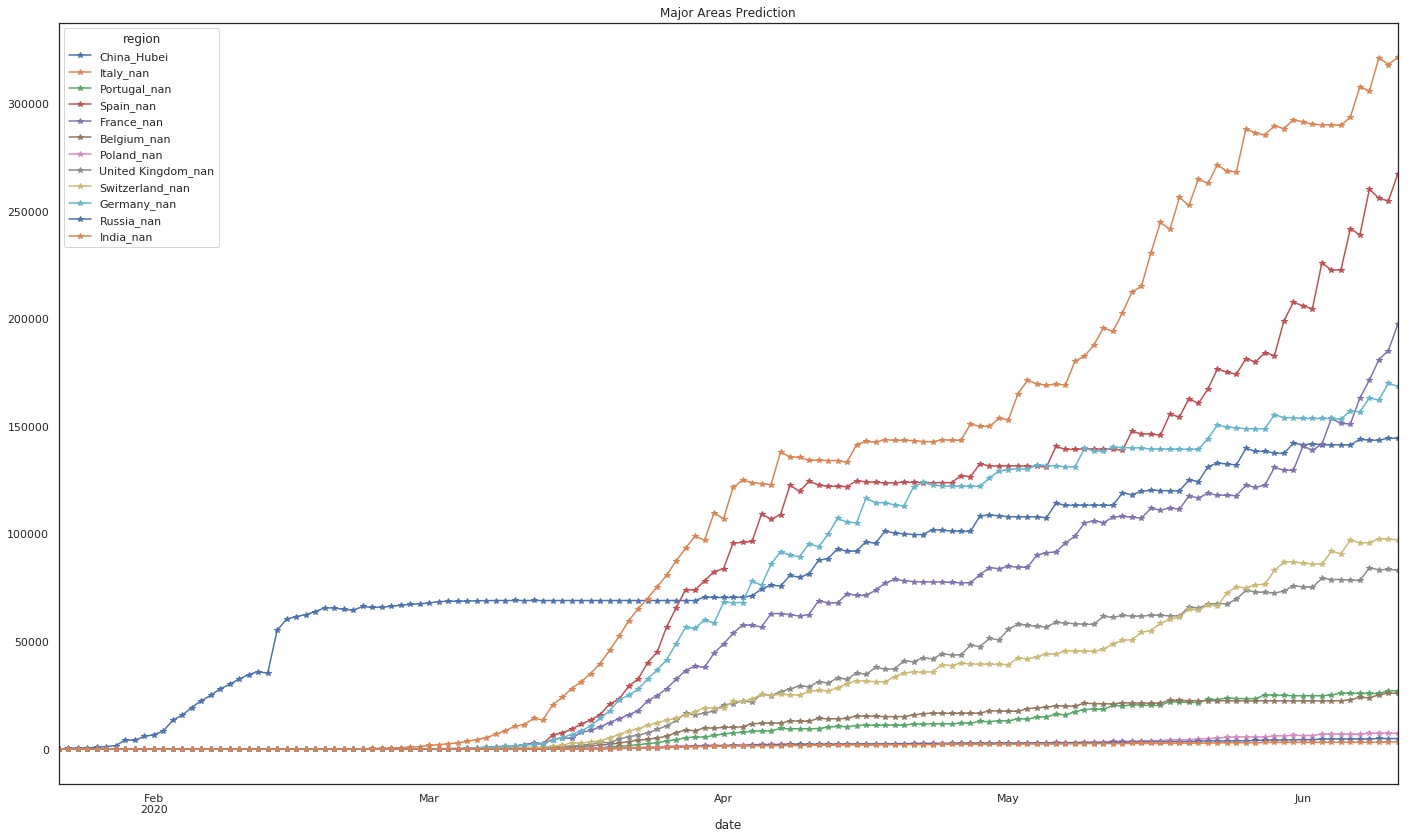

In [62]:
region=[
  #     'China_Anhui', 'China_Beijing',
  #     'China_Chongqing', 'China_Fujian', 'China_Gansu',
  #     'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
  #     'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan','China_Hunan', 
  #     'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
  #     'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
  #     'China_Shandong', 'China_Shanghai', 'China_Shanxi',
  #     'China_Sichuan',  'China_Xinjiang',
  #     'China_Yunnan', 'China_Zhejiang', 
  #      'Hong Kong_Hong Kong','Japan_nan','Others_Diamond Princess cruise ship'
  #  
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'China_Hubei',
        'Italy_nan',
  #      'United States_nan',
        'Portugal_nan', 'Spain_nan',  
   #     'Netherlands_nan',
        'France_nan', 
        'Belgium_nan', 'Poland_nan',
        'United Kingdom_nan', 'Switzerland_nan', 'Germany_nan',
         'Russia_nan', 'India_nan'
  ### JOAO - LIST of Countries - Finish here     
       ]

# region=['China_Anhui', 'China_Beijing',
#        'China_Chongqing', 'China_Fujian', 'China_Gansu',
#        'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
#        'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
#        'China_Jiangsu', 'China_Jiangxi', 'China_Liaoning',
#        'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
#        'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      
#        'China_Yunnan', 'China_Zhejiang' 
#      ]

### Joao - ERROR - KeyError: "None of [Index(['Portugal_nan', 'Andorra_nan', 'Spain_nan', 'Belgium_nan',\n       'Morocco_nan', 'Netherlands_Netherlands', 'France_France', 'Poland_nan',\n       'United Kingdom_United Kingdom', 'Switzerland_nan', 'Germany_nan',\n       'Italy_nan'],\n      dtype='object')] are in the [columns]"     

p=pred[region]
p.plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

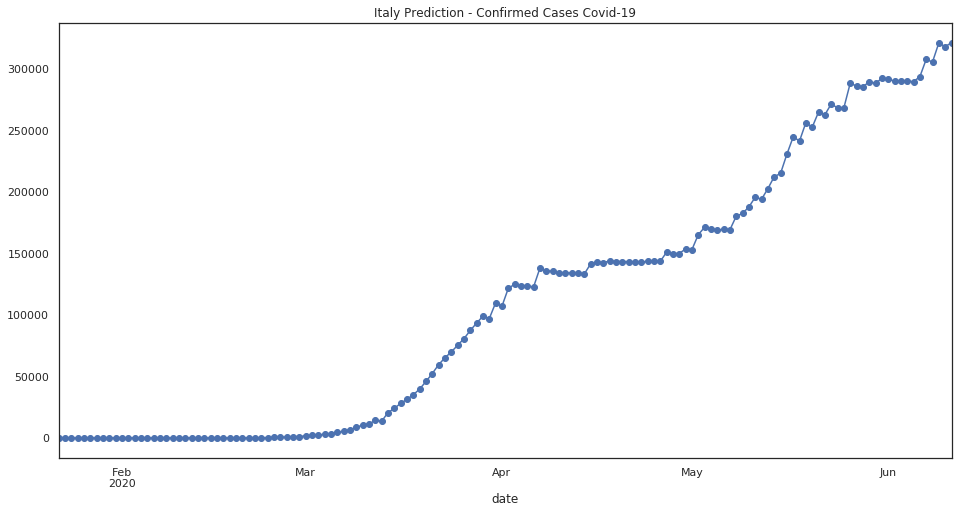

In [63]:
### Joao - Error - KeyError: 'Italy_nan'
p2=pred['Italy_nan']
p2.plot(marker='o',figsize=(16,8),title ='Italy Prediction - Confirmed Cases Covid-19')

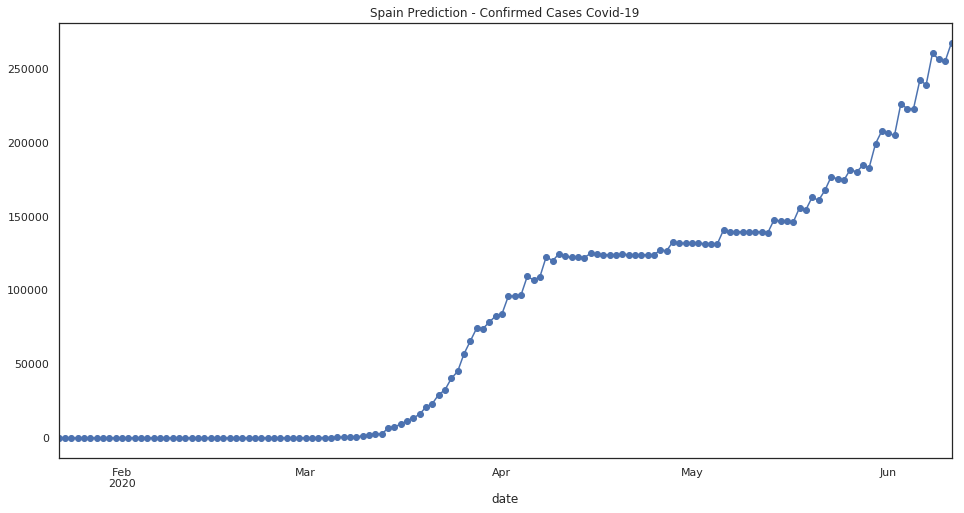

In [64]:
p3=pred['Spain_nan']
p3.plot(marker='o',figsize=(16,8),title ='Spain Prediction - Confirmed Cases Covid-19')

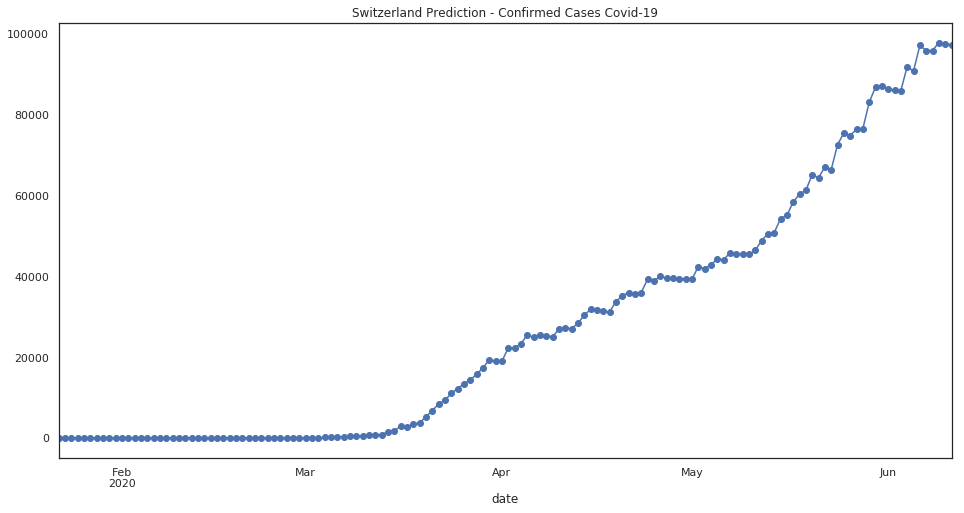

In [65]:
p4=pred['Switzerland_nan']
p4.plot(marker='o',figsize=(16,8),title ='Switzerland Prediction - Confirmed Cases Covid-19')

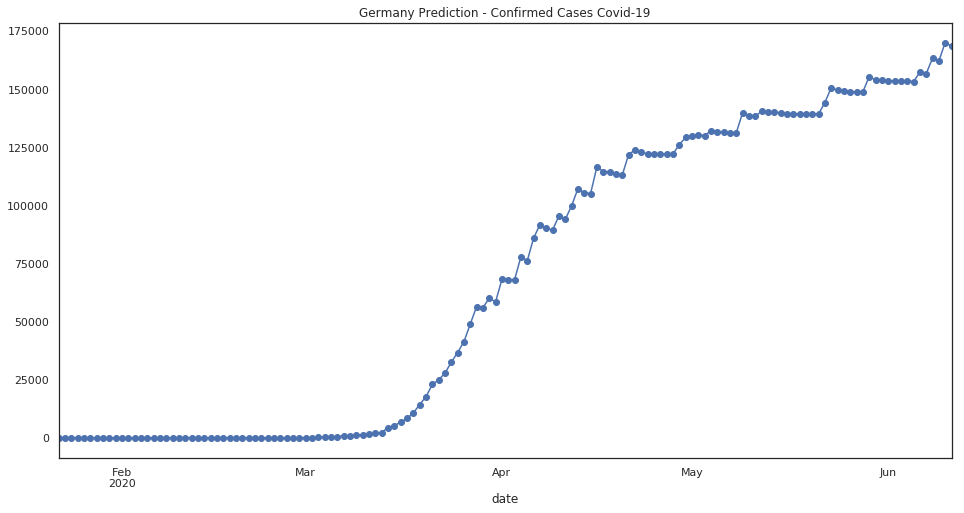

In [66]:
p5=pred['Germany_nan']
p5.plot(marker='o',figsize=(16,8),title ='Germany Prediction - Confirmed Cases Covid-19')

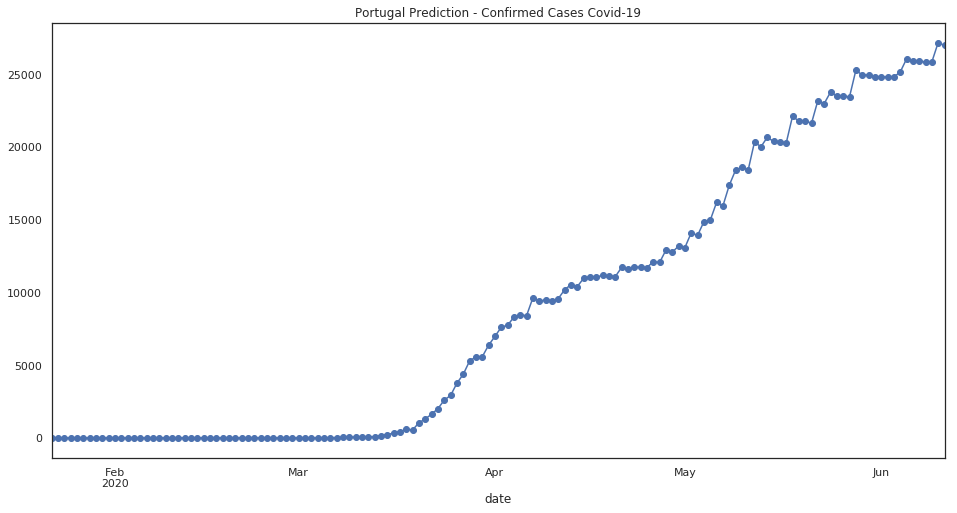

In [67]:
p6=pred['Portugal_nan']
p6.plot(marker='o',figsize=(16,8),title ='Portugal Prediction - Confirmed Cases Covid-19')

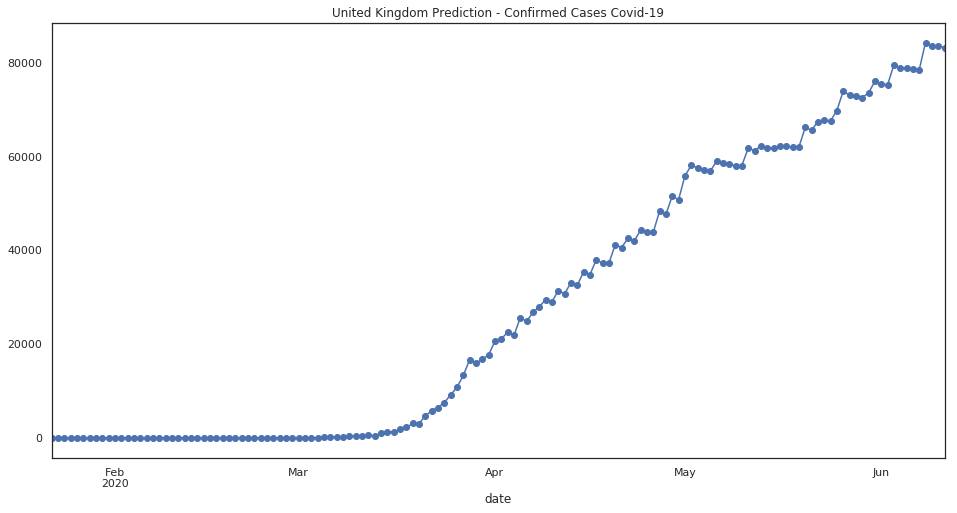

In [69]:
p8=pred['United Kingdom_nan']
p8.plot(marker='o',figsize=(16,8),title ='United Kingdom Prediction - Confirmed Cases Covid-19')

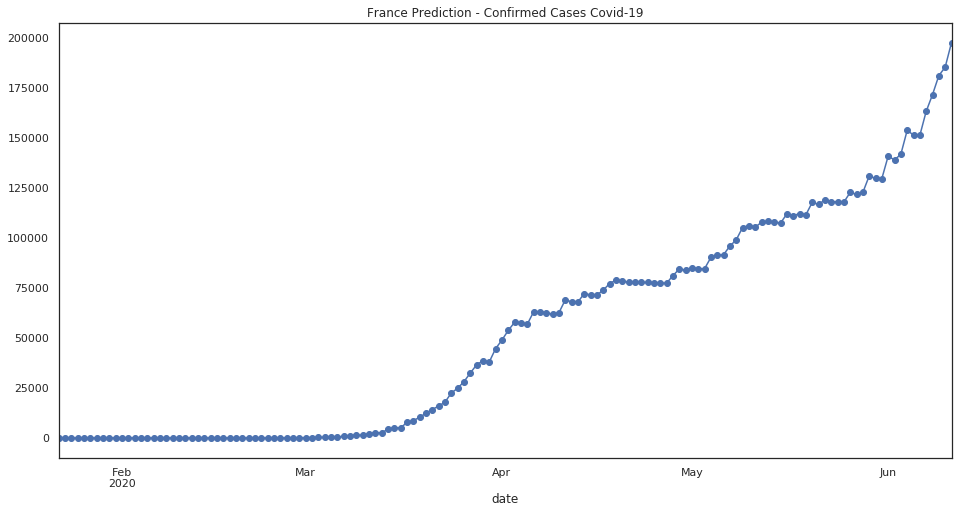

In [70]:
p9=pred['France_nan']
p9.plot(marker='o',figsize=(16,8),title ='France Prediction - Confirmed Cases Covid-19')

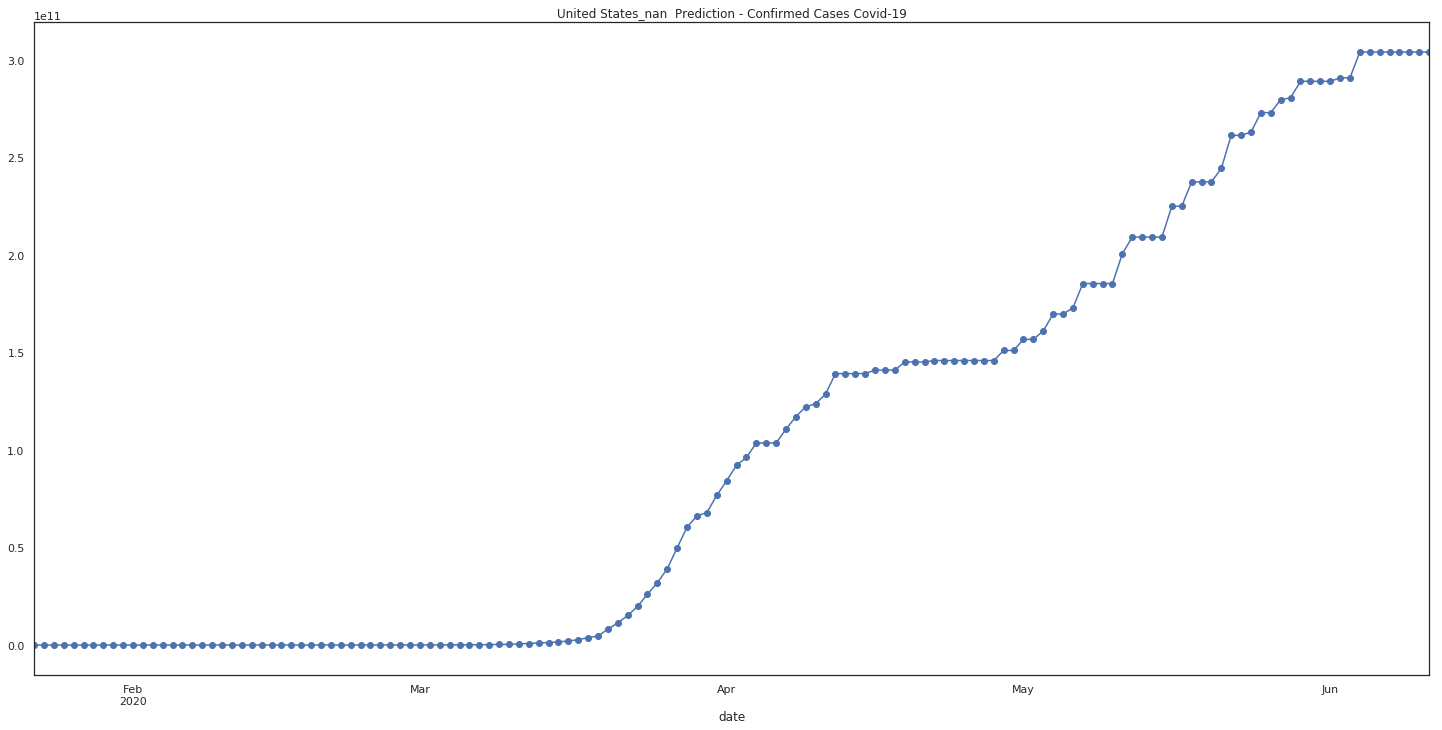

In [82]:
p10=pred['United States_nan']
p10.plot(marker='o',figsize=(25,12),title ='United States_nan  Prediction - Confirmed Cases Covid-19')

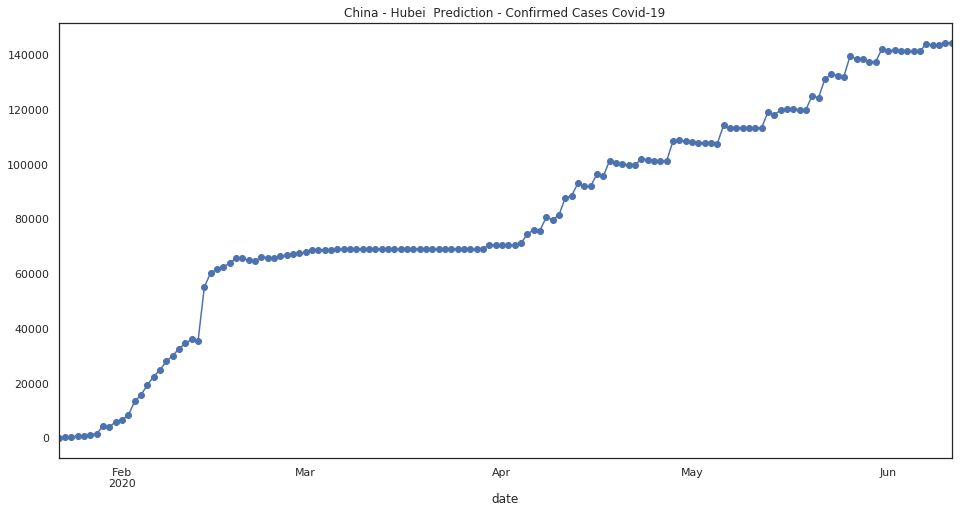

In [83]:
p11=pred['China_Hubei']
p11.plot(marker='o',figsize=(16,8),title ='China - Hubei  Prediction - Confirmed Cases Covid-19')

In [84]:
pv1=p #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)


## Prediction Heatmap

In [85]:
p[:6]

region      China_Hubei  Italy_nan  Portugal_nan  Spain_nan  France_nan  \
date                                                                      
2020-01-22          5.0       12.0           7.0        7.0        11.0   
2020-01-23        444.0       11.0           7.0        7.0         8.0   
2020-01-24        454.0        9.0           4.0        4.0        13.0   
2020-01-25        580.0        7.0           5.0        5.0        13.0   
2020-01-26        844.0        9.0           9.0        9.0         8.0   
2020-01-27       1190.0       11.0           8.0        8.0         5.0   

region      Belgium_nan  Poland_nan  United Kingdom_nan  Switzerland_nan  \
date                                                                       
2020-01-22          3.0         1.0                 1.0              1.0   
2020-01-23          3.0         1.0                 1.0              1.0   
2020-01-24          5.0         1.0                 1.0              1.0   
2020-01-25          4.0         1.0                 1.0              1.0   
2020-01-26          1.0         1.0                 1.0              1.0   
2020-01-27          4.0         1.0                 1.0              1.0   

region      Germany_nan  Russia_nan  India_nan  
date                                            
2020-01-22          5.0         5.0       14.0  
2020-01-23          5.0         5.0       11.0  
2020-01-24          7.0        10.0       12.0  
2020-01-25          2.0        10.0       16.0  
2020-01-26          6.0         6.0       15.0  
2020-01-27          5.0        11.0       16.0

In [86]:
pip install gmplot

Note: you may need to restart the kernel to use updated packages.


In [87]:
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [88]:
heatmap=confirmed[['region','Lat','Long']]
p_m=pred.T
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')

In [103]:
heatmap_m.columns.values[:145] #9/30/61/107/145

array(['region', 'Lat', 'Long', Timestamp('2020-01-22 00:00:00'),
       Timestamp('2020-01-23 00:00:00'), Timestamp('2020-01-24 00:00:00'),
       Timestamp('2020-01-25 00:00:00'), Timestamp('2020-01-26 00:00:00'),
       Timestamp('2020-01-27 00:00:00'), Timestamp('2020-01-28 00:00:00'),
       Timestamp('2020-01-29 00:00:00'), Timestamp('2020-01-30 00:00:00'),
       Timestamp('2020-01-31 00:00:00'), Timestamp('2020-02-01 00:00:00'),
       Timestamp('2020-02-02 00:00:00'), Timestamp('2020-02-03 00:00:00'),
       Timestamp('2020-02-04 00:00:00'), Timestamp('2020-02-05 00:00:00'),
       Timestamp('2020-02-06 00:00:00'), Timestamp('2020-02-07 00:00:00'),
       Timestamp('2020-02-08 00:00:00'), Timestamp('2020-02-09 00:00:00'),
       Timestamp('2020-02-10 00:00:00'), Timestamp('2020-02-11 00:00:00'),
       Timestamp('2020-02-12 00:00:00'), Timestamp('2020-02-13 00:00:00'),
       Timestamp('2020-02-14 00:00:00'), Timestamp('2020-02-15 00:00:00'),
       Timestamp('2020-02-16 00:00

In [105]:
### JOAO - Error - IndexError: single positional indexer is out-of-bounds
heatmap=pd.DataFrame(p)
vmaxni=145
vmaxnii=60+(145-113)
#for i in range(0,len(heatmap_m)):
#    if heatmap_m.iloc[i,vmaxni].astype(int)==0:  # heatmap_m.iloc[i,61] # heatmap_m.iloc[i,9] columns is the date we want to check
#        continue
        
heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:3]]*abs(heatmap_m.iloc[i,vmaxnii].astype(int)), ignore_index=True,sort=False))

/home/notebookuser/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [106]:
latitudes = heatmap['Lat']
longitudes = heatmap['Long']
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(46.99474,6.87237, 4)
gmap.heatmap(latitudes, longitudes)
# Generate the heatmap into an HTML file
gmap.draw("Heatmap4-2020-02-28.html")

In [107]:
exit()

H2O session _sid_8f3d closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
